In [2]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


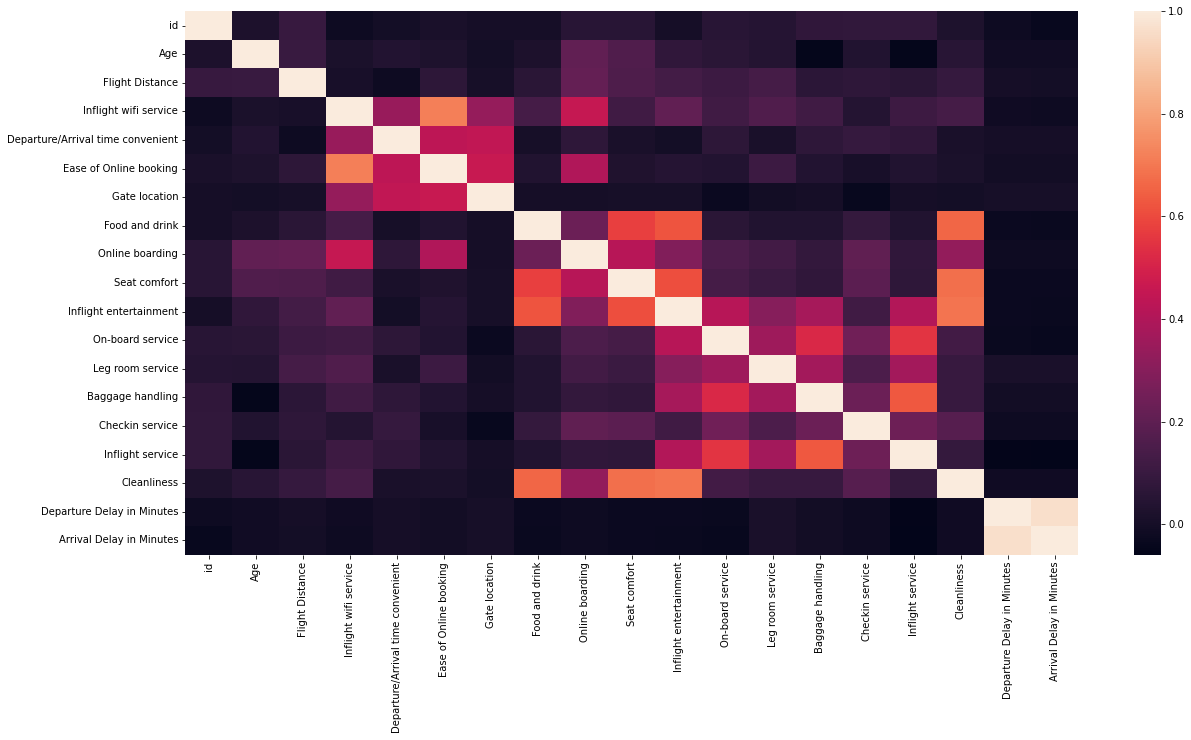

In [5]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c);

In [6]:
df.drop(["Arrival Delay in Minutes"],axis=1,inplace=True)

In [7]:
x = df[df.columns[7:21]]
x.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [8]:
len(x.columns)

14

In [9]:
chi_square_value,p_value = calculate_bartlett_sphericity(x)

In [10]:
chi_square_value,p_value

(601690.8930479626, 0.0)

In [11]:
kmo_all,kmo_model = calculate_kmo(x)
kmo_model

0.7812294257164378

In [12]:
##Create factor analysis

In [13]:
fa = FactorAnalyzer()
fa.fit(x,14)
ev,v = fa.get_eigenvalues()
ev

array([3.80011677, 2.36198598, 2.16589224, 1.06327401, 0.95093123,
       0.7003355 , 0.53995637, 0.51465504, 0.46947475, 0.36866001,
       0.32840792, 0.29509562, 0.25317089, 0.18804368])

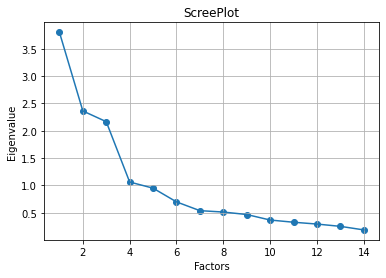

In [14]:
#Creates scree plot using matplotlib

plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title("ScreePlot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [15]:
fa = FactorAnalyzer(4,rotation='promax')
fa.fit(x)
loads=fa.loadings_

In [16]:
loadings=pd.DataFrame(loads)

In [17]:
loadings

,0,1,2,3
0,-0.017943,0.041272,0.499750,0.464001
1,0.016234,0.054087,0.606817,-0.068733
2,-0.128669,-0.049021,0.665939,0.450739
3,0.082610,-0.041434,0.730367,-0.187674
4,0.810338,-0.120425,0.057920,-0.032733
5,0.088286,-0.041303,-0.092479,0.823187
6,0.732636,-0.065415,-0.053318,0.169248
7,0.747024,0.367021,0.058879,-0.080358
8,-0.013403,0.715014,-0.013177,-0.008602
9,-0.027662,0.483435,0.008883,0.061796


In [18]:
loadings.index = x.columns
loadings.columns=["Factor 1","Factor 2","Factor 3","Factor 4"]


In [19]:
loadings.to_csv("factor_loadings2.csv")

In [20]:
loadings.columns=["Comfort","Service","Convinience","f4"]


In [21]:
loadings

,Comfort,Service,Convinience,f4
Inflight wifi service,-0.017943,0.041272,0.499750,0.464001
Departure/Arrival time convenient,0.016234,0.054087,0.606817,-0.068733
Ease of Online booking,-0.128669,-0.049021,0.665939,0.450739
Gate location,0.082610,-0.041434,0.730367,-0.187674
Food and drink,0.810338,-0.120425,0.057920,-0.032733
Online boarding,0.088286,-0.041303,-0.092479,0.823187
Seat comfort,0.732636,-0.065415,-0.053318,0.169248
Inflight entertainment,0.747024,0.367021,0.058879,-0.080358
On-board service,-0.013403,0.715014,-0.013177,-0.008602
Leg room service,-0.027662,0.483435,0.008883,0.061796


In [22]:
fa.get_communalities()

array([0.46707234, 0.37614035, 0.6655997 , 0.57719837, 0.67557595,
       0.69568925, 0.57252234, 0.70267238, 0.51167184, 0.2383724 ,
       0.65907191, 0.08915608, 0.73457752, 0.76207342])

In [23]:
fa.get_uniquenesses()

array([0.53292766, 0.62385965, 0.3344003 , 0.42280163, 0.32442405,
       0.30431075, 0.42747766, 0.29732762, 0.48832816, 0.7616276 ,
       0.34092809, 0.91084392, 0.26542248, 0.23792658])